In [2]:
import os
os.chdir('../..')
os.getcwd()

'C:\\Users\\fim19\\MY_FILES\\studying\\MIPT\\masters_paper\\work_with_data\\code'

In [4]:
from os import listdir
from nilmtk import STATS_CACHE

from utils.constants import DatasetType
from utils.data_reading import process_data, read_processed_data, convert_to_nilmtk_format
from utils.preprocessing import generate_sync_signals
from utils.timing import time_measure


STATS_CACHE.store.close()

In [5]:
ideal = read_processed_data(DatasetType.IDEAL)


[reading processed IDEAL dataset] finished in 1m 9.55s


In [6]:
data0 = next(iter(ideal.values()))

In [9]:
print(type(data0.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [9]:

# data0 = next(iter(ideal.values()))
# print(type(data0))
# print(data0)
sync_signals = generate_sync_signals(data0, 5)

[generating sync signals] finished in 1m 41.05s


In [12]:

# import pandas as pd
# sync_signals = pd.Series(sync_signals)
print(type(data0))
# print(data0)
print(type(sync_signals))
# print(sync_signals)

print(type(sync_signals.values[:20]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [18]:

print(data0.values[:100])
for i in range(20):
    print(sum(data0.values[:5*i]), end=' ')
print()
print(sync_signals.values[:20])

[  0 170 189 184 113 170 165 170 167  58 175 167 180 167 165 170  55  85
 170 165 170 170 170 170 167 170 165 170 167 167 167  82  85 167 170 170
 165 170 170 167 167 170 170 167 165 175 170 170 167   0 137 169 167 170
 170 170 167 167 170 170 137 170 170 167 167 167 165 170 167 167 165 170
 172 170 167 170 172 137 165 167 170 170 167 184 182 180 174 189 201 184
 194 182 177 172 175 175 180 187 175 182]
0 656 1386 2240 2885 3732 4571 5242 6084 6923 7605 8418 9262 10073 10909 11753 12564 13437 14365 15265 
[  656  1386  2240  2885  3732  4571  5242  6084  6923  7605  8418  9262
 10073 10909 11753 12564 13437 14365 15265 16164]


In [10]:
from utils.preprocessing import generate_sync_signals_new
sync_signals1 = generate_sync_signals_new(data0, 5)

29935571 29935570
5987114 5987114
[generating sync signals] finished in 0m 9.15s


In [11]:

print(sync_signals1.values[:20])

[  656  1386  2240  2885  3732  4571  5242  6084  6923  7605  8418  9262
 10073 10909 11753 12564 13437 14365 15265 16164]


In [13]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


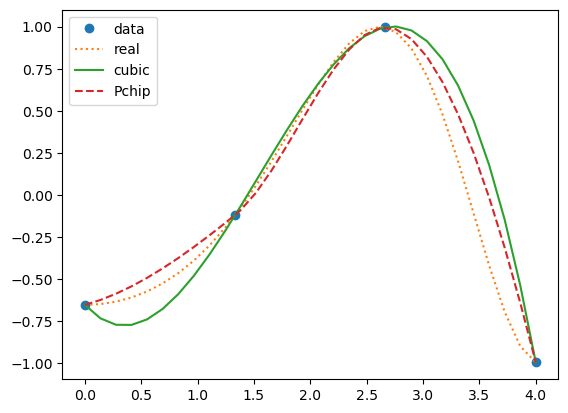

In [55]:
x = np.linspace(0, 4, 4)
y = np.cos(x**2/3+4)
xnew = np.linspace(0, 4, 30)

f1 = interpolate.CubicSpline(x, y)
f2 = interpolate.PchipInterpolator(x, y)

plt.plot(x, y, 'o', xnew, np.cos(xnew**2/3+4), ':', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'real', 'cubic', 'Pchip'], loc = 'best')
plt.show()

# ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’

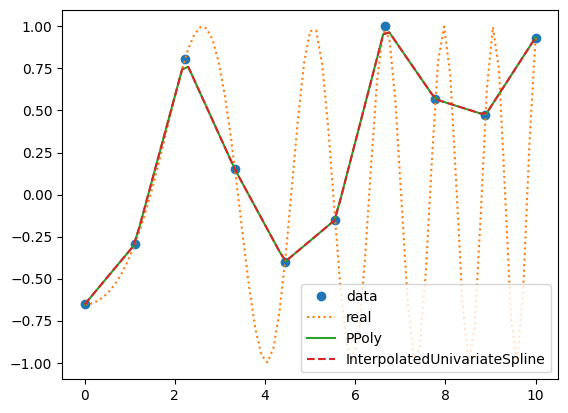

In [10]:
import numpy as np
import pandas as pd
from scipy.interpolate import PchipInterpolator  # PCHIP 1-D monotonic cubic interpolation
from scipy.interpolate import CubicSpline, UnivariateSpline, InterpolatedUnivariateSpline, splrep, splev, PPoly
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10)
y = np.cos(x**2/3+4)
xnew = np.linspace(0, 10, 75)

tck = splrep(x, y, k=1, s=0)
f1 = PPoly.from_spline(tck)
f2 = InterpolatedUnivariateSpline(x, y, k=1)

plt.plot(x, y, 'o', xnew, np.cos(xnew**2/3+4), ':', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'real', 'PPoly', 'InterpolatedUnivariateSpline'], loc = 'best')
plt.show()

In [4]:
DAY_IN_SEC = 60 * 60 * 24
import numpy as np

In [5]:
from utils.preprocessing import generate_sync_signals, get_stable_periods

int_dates = data0.index.astype(np.int64) // 10**9
periods = get_stable_periods(int_dates, duration=DAY_IN_SEC, max_gap=5)
print(periods[0])

[getting stable periods] finished in 1m 45.38s
(6141816, 6226670)


In [70]:
6226670 - 6141816

84854

In [64]:
DAY_IN_SEC

86400

In [6]:
period_slice = slice(periods[0][0], periods[0][1])
stable_period = data0.iloc[period_slice]
print(type(stable_period), len(stable_period))

<class 'pandas.core.series.Series'> 84854


In [74]:
dates = stable_period.index.astype(np.int64) // 10**9
dates[0], dates[-1]

(1499609440, 1499695839)

In [76]:
1499695839-1499609440+1

86400

In [91]:
stable_period.index[0]

Timestamp('2017-07-09 15:10:40+0100', tz='Europe/London')

In [89]:
import pandas as pd
pd.Timestamp(1499609440, unit='s', tz=stable_period.index[0].tz)

Timestamp('2017-07-09 15:10:40+0100', tz='Europe/London')

In [ ]:
1499609440

In [7]:
from utils.preprocessing import interpolate_missed_data

In [11]:
interpolated = interpolate_missed_data(stable_period)

[interpolation] finished in 0m 0.05s


In [15]:
interpolated.index[0]

Timestamp('2017-07-09 15:10:40+0100', tz='Europe/London')

In [16]:
len(interpolated.values)

86400

In [9]:
import numpy as np
import pandas as pd
from scipy.interpolate import PchipInterpolator  # PCHIP 1-D monotonic cubic interpolation

from utils.constants import MONTH_IN_SEC
from utils.timing import time_measure

In [10]:

def interpolate_missed_data(data: pd.Series):
    with time_measure(f'interpolation'):
        dates = data.index.astype(np.int64) // 10 ** 9
        all_dates = np.arange(dates[0], dates[-1] + 1)
        interpolation_func = PchipInterpolator(dates, data.values)
        formatted_dates = pd.to_datetime(all_dates, unit='s', utc=True).tz_convert(tz=data.index[0].tz)
        return pd.Series(interpolation_func(all_dates), index=formatted_dates)

In [19]:
periods = get_stable_periods(int_dates, duration=DAY_IN_SEC, max_gap=5)

[getting stable periods] finished in 1m 27.60s


In [20]:
periods

[(719739, 1299992),
 (2448499, 3039642),
 (3629449, 4216714),
 (4401257, 4987445),
 (5070375, 5655633),
 (6423572, 7017032),
 (7919164, 8504516),
 (9196316, 9785594),
 (9785594, 10370541),
 (11670680, 12261303),
 (12303608, 12889296),
 (13396880, 13989655),
 (15276052, 15864883),
 (16860211, 17455493),
 (17455493, 18048502),
 (18048502, 18643868),
 (20622937, 21217046),
 (24908900, 25498507)]

In [24]:
new_periods = get_stable_periods(int_dates, duration=DAY_IN_SEC*30, max_gap=60*5)
new_periods

[getting stable periods] finished in 1m 26.19s


[(5796083, 8330060), (11670680, 14198823), (15183697, 17710278)]

In [23]:
sl = slice(*new_periods[0])
sl

slice(9196316, 10370541, None)

In [ ]:
periods = get_stable_periods(int_dates, duration=DAY_IN_SEC*7, max_gap=60)

In [1]:
import numpy as np
from nilmtk import STATS_CACHE

from utils.constants import DatasetType, DAY_IN_SEC
from utils.data_reading import process_data, read_processed_data, convert_to_nilmtk_format
from utils.preprocessing import generate_sync_signals, get_stable_periods, \
    interpolate_missed_data, generate_async_signals, reformat_to_accumulated
from utils.timing import time_measure

STATS_CACHE.store.close()

In [2]:
ideal = read_processed_data(DatasetType.IDEAL)

[reading processed IDEAL dataset] finished in 1m 10.99s


In [43]:
start = DAY_IN_SEC*178 + 60*60*7 + 60*29 + 37
length = 10

iterator = iter(ideal.values())
for i in range(1):
#     dates = next(iterator).index[::DAY_IN_SEC*30]
    dates = next(iterator).index[start: start + length]
    for d in dates:
        print(d, d.tz, d.timestamp())
#     print(dates[0])
#     print(list(dates.tz))
    print()

2017-10-29 01:59:55+01:00 Europe/London 1509238795.0
2017-10-29 01:59:56+01:00 Europe/London 1509238796.0
2017-10-29 01:59:57+01:00 Europe/London 1509238797.0
2017-10-29 01:59:58+01:00 Europe/London 1509238798.0
2017-10-29 01:59:59+01:00 Europe/London 1509238799.0
2017-10-29 01:00:00+00:00 Europe/London 1509238800.0
2017-10-29 01:00:01+00:00 Europe/London 1509238801.0
2017-10-29 01:00:02+00:00 Europe/London 1509238802.0
2017-10-29 01:00:03+00:00 Europe/London 1509238803.0
2017-10-29 01:00:04+00:00 Europe/London 1509238804.0



In [44]:
data0 = next(iter(ideal.values()))

In [45]:
sl = data0[start: start + length]
sl

2017-10-29 01:59:55+01:00    184
2017-10-29 01:59:56+01:00    182
2017-10-29 01:59:57+01:00    184
2017-10-29 01:59:58+01:00    182
2017-10-29 01:59:59+01:00    182
2017-10-29 01:00:00+00:00    182
2017-10-29 01:00:01+00:00    184
2017-10-29 01:00:02+00:00    184
2017-10-29 01:00:03+00:00    182
2017-10-29 01:00:04+00:00    184
Name: (power, apparent), dtype: int64

In [46]:
interpolated = interpolate_missed_data(sl, duration=length)
accumulated = reformat_to_accumulated(interpolated)

async_signals = generate_async_signals(accumulated, 100)
async_signals

[interpolation] finished in 0m 0.05s
[reformatting to accumulated] finished in 0m 0.01s
[generating async signals] finished in 0m 0.01s


2017-10-29 01:59:54+01:00                 0
2017-10-29 01:59:54.542114304+01:00     100
2017-10-29 01:59:55.087551488+01:00     200
2017-10-29 01:59:55.637708800+01:00     300
2017-10-29 01:59:56.185302528+01:00     400
2017-10-29 01:59:56.727766528+01:00     500
2017-10-29 01:59:57.273936896+01:00     600
2017-10-29 01:59:57.824036864+01:00     700
2017-10-29 01:59:58.373626368+01:00     800
2017-10-29 01:59:58.923076864+01:00     900
2017-10-29 01:59:59.473169920+01:00    1000
2017-10-29 01:00:00.021852928+00:00    1100
2017-10-29 01:00:00.565802240+00:00    1200
2017-10-29 01:00:01.108637952+00:00    1300
2017-10-29 01:00:01.651364096+00:00    1400
2017-10-29 01:00:02.197278976+00:00    1500
2017-10-29 01:00:02.747762176+00:00    1600
2017-10-29 01:00:03.294616576+00:00    1700
2017-10-29 01:00:03.837709312+00:00    1800
dtype: int32

In [47]:

periods = get_stable_periods(data0, duration=DAY_IN_SEC*7, max_gap=60)
periods

[getting stable periods] finished in 0m 29.04s


[slice(719739, 1299992, None),
 slice(2448499, 3039642, None),
 slice(3629449, 4216714, None),
 slice(4401257, 4987445, None),
 slice(5070375, 5655633, None),
 slice(6423572, 7017032, None),
 slice(7919164, 8504516, None),
 slice(9196316, 9785594, None),
 slice(9785594, 10370541, None),
 slice(11670680, 12261303, None),
 slice(12303608, 12889296, None),
 slice(13396880, 13989655, None),
 slice(15276052, 15864883, None),
 slice(16860211, 17455493, None),
 slice(17455493, 18048502, None),
 slice(18048502, 18643868, None),
 slice(20622937, 21217046, None),
 slice(24908900, 25498507, None)]